# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [38]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('exch_rates.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


In [39]:
# your code here
df['Frequency'] = pd.to_datetime(df['Frequency'])
df = df.set_index('Frequency')
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20',
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26'],
              dtype='datetime64[ns]', name='Frequency', length=6905, freq=None)

Plot the three exchange rates in one plot

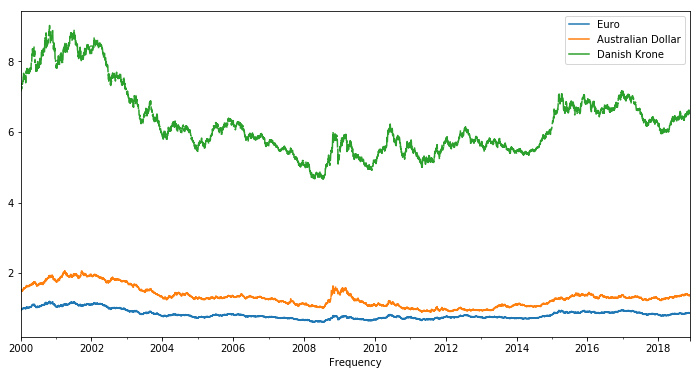

In [40]:
# your code here
df.plot(figsize=(12,6))
plt.show()

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [41]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [ ]:
# The exchange rates for Euro and the Australian dollar are highly correlated, 
# but there are differences. The Euro and the Danish Krone, however, is perfectly correlated. 
# If you do further research you'll notice that the Danish Krone is pegged to the Euro, 
# which means that they are basically designed to perfectly correlate together! 
# The fact that the value is just very, very close to 1 is due to rounding errors.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002468303C908>,
      dtype=object)

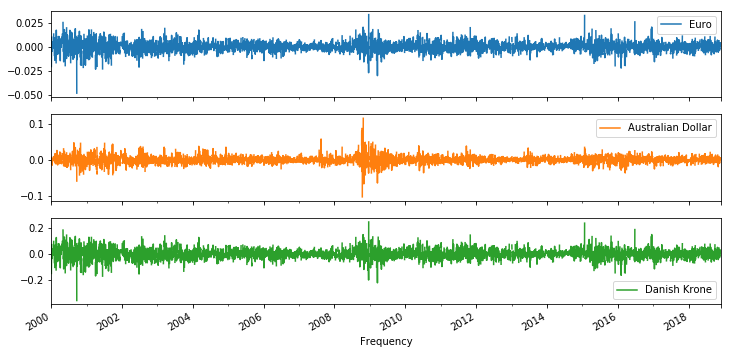

In [42]:
# your code here
df_diff = df.diff(periods=1)
df_diff.plot(figsize=(12,6), subplots=True, legend=True)

In [43]:
# your code here
df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [44]:
# Differencing the series here led to a decrease 
# in correlation between the EUR/USD and AUD/Danish Krone series. 
# If you think a little further, this makes sense: in the lecture before, 
# the high correlation was a result of seasonality. 
# Differencing led to an increase in correlation between series, 
# here the series are moving in the (more or less) same direction 
# on a day-to-day basis and seasonality is not present, hence this result.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [45]:
# your code here
eur = df[['Euro']]
eur.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,0.991080
2000-01-04,0.970403
2000-01-05,0.964506


In [46]:
# your code here
eur_shift_1 = eur.shift(periods=1)
eur_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


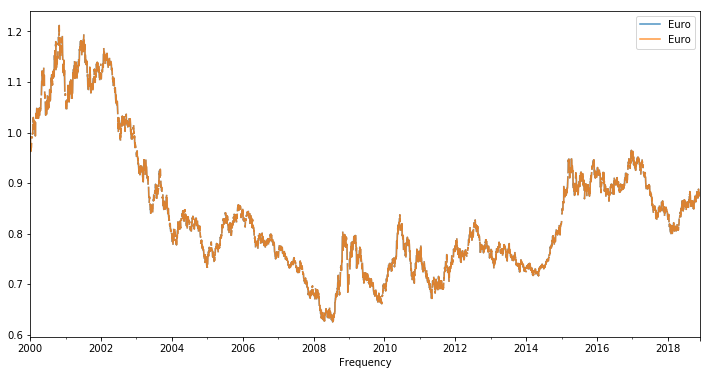

In [48]:
# your code here
lag_1 = pd.concat([eur, eur_shift_1], axis=1)
lag_1.plot(figsize=(12,6), alpha=0.8)

In [49]:
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

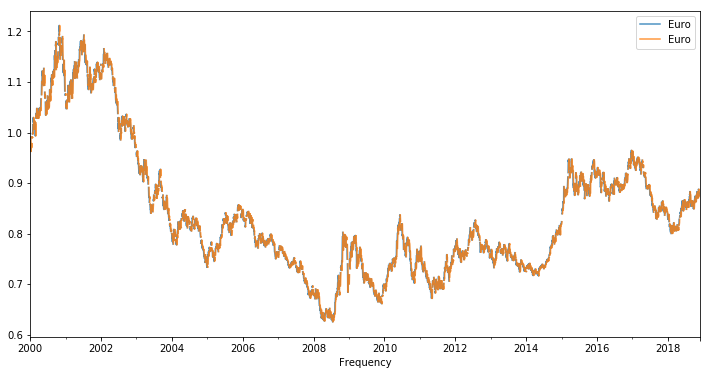

In [50]:
# your code here
eur_shift_5 = eur.shift(periods=5)
lag_5 = pd.concat([eur, eur_shift_5], axis=1)
lag_5.plot(figsize=(12,6), alpha=0.8)

In [51]:
lag_5.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


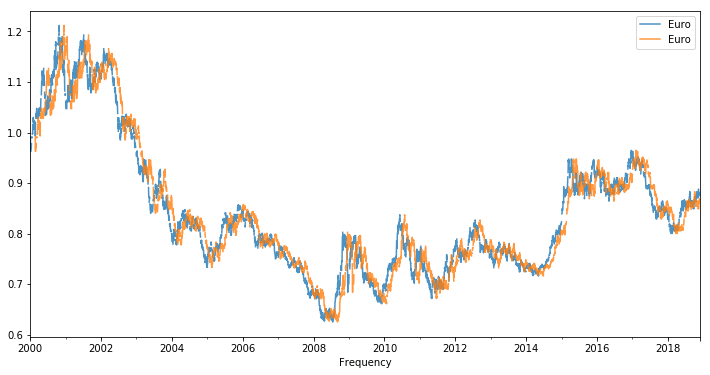

In [52]:
# your code here
eur_shift_50 = eur.shift(periods=50)
lag_50 = pd.concat([eur, eur_shift_50], axis=1)
lag_50.plot(figsize=(12,6), alpha=0.8)

In [53]:
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [54]:
# Autocorrelation is very high in these time series, even up to a lag as big as 50!.
# This is no big surprise though: remember that these are random walk series, 
# which are highly recursive, as each value depends heavily on the previous one.

Knowing this, let's plot the ACF now.

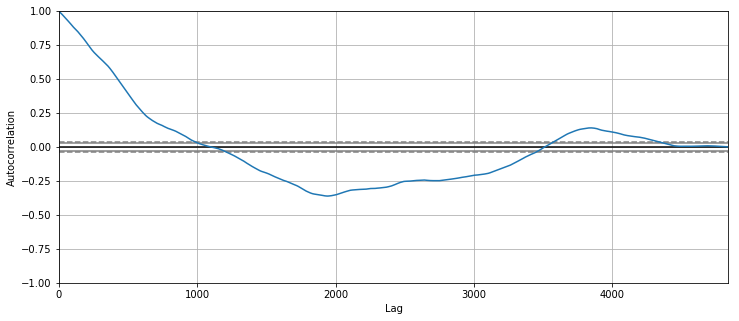

In [55]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

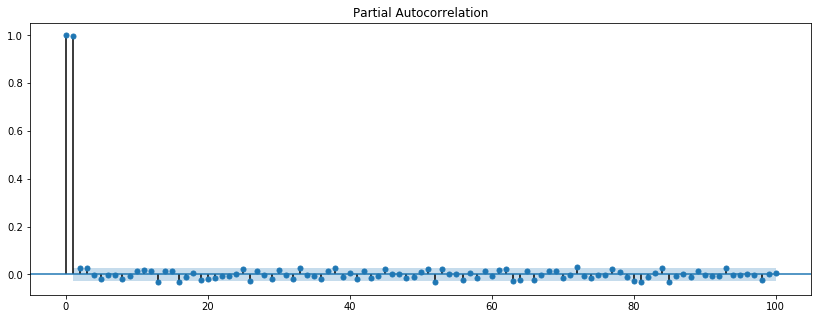

In [56]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(eur.dropna(), lags = 100, method='ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [57]:
# your code here
air= pd.read_csv('passengers.csv')
air.Month = pd.to_datetime(air.Month)
air.set_index('Month', inplace = True)

In [58]:
air.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

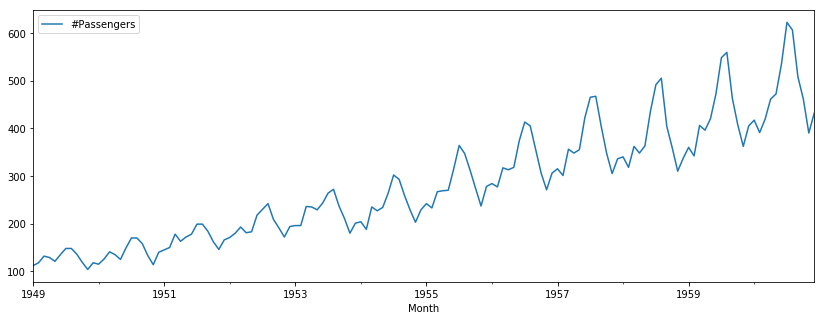

In [59]:
# your code here
air.plot()

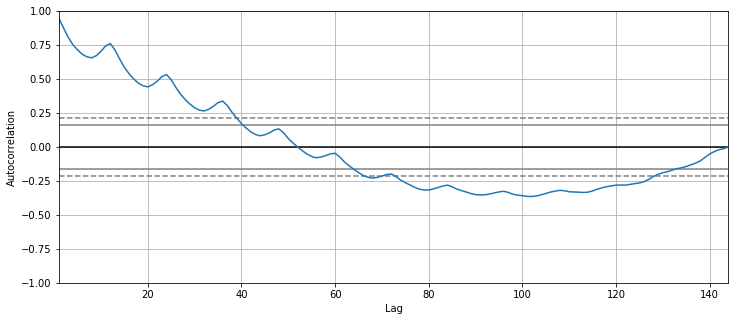

In [60]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air);

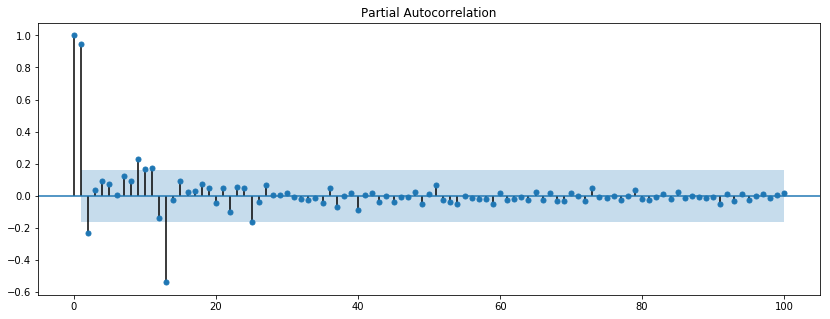

In [61]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(air.dropna(), lags = 100, method='ywm');

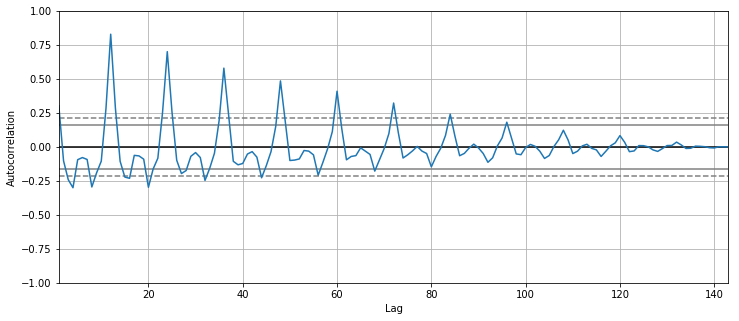

In [62]:
# your code here
air_diff = air.diff(periods=1)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_diff.dropna());

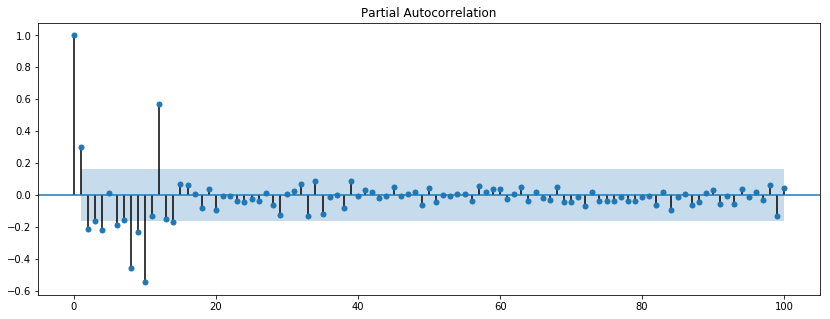

In [63]:
# your code here
rcParams['figure.figsize'] = 14, 5

plot_pacf(air_diff.dropna(), lags = 100, method='ywm');

### Your conclusion here

In [64]:
# The result reminds us a lot of the google trends data. 
# The seasonality is much more clear in the differenced time series. 
# The PACF has just one very strong correlation, right at 12 months.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [65]:
# your code here
nyse = pd.read_csv("NYSE_monthly.csv")
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


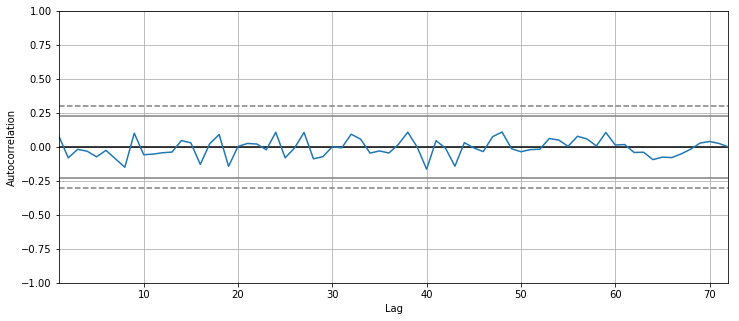

In [66]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse.dropna());

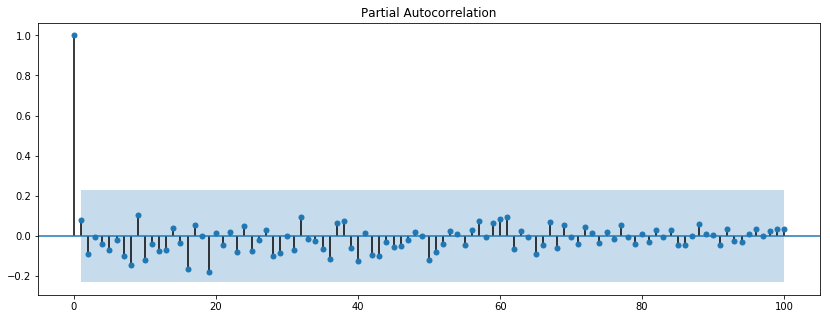

In [67]:
# your code here
rcParams['figure.figsize'] = 14, 5

plot_pacf(nyse, lags = 100, method='ywm');

## Your conclusion here

In [68]:
# Autocorrelations and partial autocorrelations are virtually 0 for any lag. 
# This is no surprise! The NYSE series was a white noise series, meaning there is no trend or no seasonality! 
# This is, again, a typical result for these kind of series.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!